In [2]:
import numpy as np # inear algebra
import pandas as pd #data manipulation library
import seaborn as sns
import matplotlib.pyplot as plt #data visuaizition
from sklearn.linear_model import LinearRegression # for linear Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn import metrics # for checking the model accuracy
from pandas import Series, DataFrame

 



### Load Dataset Using Pandas

In [3]:
df = pd.read_csv("./recs2015_public_v4-1.csv") 


In [4]:
df.head()

,DOEID,REGIONC,DIVISION,METROMICRO,UATYP10,TYPEHUQ,ZTYPEHUQ,CELLAR,ZCELLAR,BASEFIN,...,ZELAMOUNT,NGXBTU,PERIODNG,ZNGAMOUNT,FOXBTU,PERIODFO,ZFOAMOUNT,LPXBTU,PERIODLP,ZLPAMOUNT
0,10001,4,10,METRO,U,2,0,0,0,-2,...,0,103.32,1,0,137.45,-2,-2,91.33,-2,-2
1,10002,3,7,NONE,R,2,0,0,0,-2,...,1,NaN,-2,-2,137.45,-2,-2,91.33,-2,-2
2,10003,3,6,METRO,U,2,0,1,0,1,...,0,100.14,1,0,137.45,-2,-2,91.33,-2,-2
3,10004,2,4,MICRO,C,2,0,1,0,1,...,0,NaN,-2,-2,137.45,-2,-2,91.33,2,0
4,10005,1,2,METRO,U,2,0,1,0,0,...,0,102.83,1,0,137.45,-2,-2,91.33,-2,-2


### Correlation Heat Map 

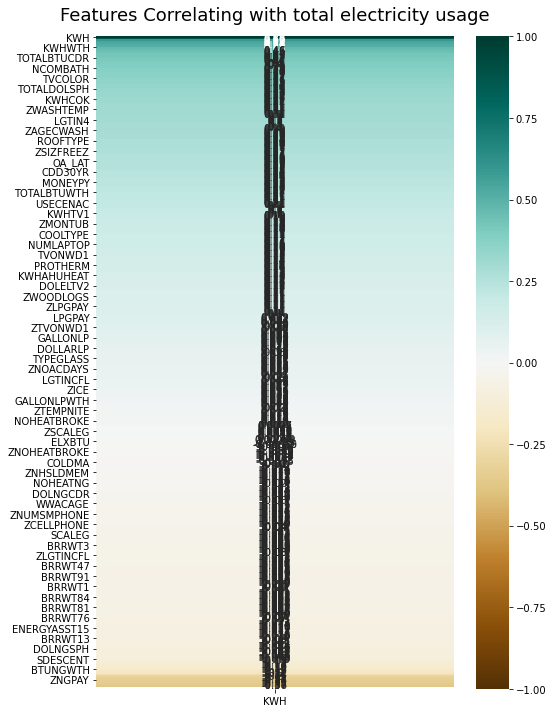

In [5]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['KWH']].sort_values(by='KWH', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with total electricity usage', fontdict={'fontsize':18}, pad=16);

### Drop unnecessary columns 

In [6]:
df.drop(df.columns.difference(['KWH','TOTSQFT_EN','NCOMBATH','TOTROOMS','	TOTSQFT_EN','ZBEDROOMS','FUELPOOL','RECBATH','ROOFTYPE']), 1, inplace=True)

### save into a new csv file

In [7]:
df.to_csv('electricity.csv', index=False)


In [8]:
dataframe = pd.read_csv("electricity.csv") 


In [9]:
dataframe.head()

,ZBEDROOMS,NCOMBATH,TOTROOMS,ROOFTYPE,FUELPOOL,RECBATH,TOTSQFT_EN,KWH
0,0,2,7,1,-2,0,1808,5270.742
1,0,1,4,3,-2,0,759,12173.000
2,0,2,9,5,-2,0,2288,19655.394
3,0,2,7,5,-2,0,2573,9852.535
4,0,2,6,5,-2,0,1024,3115.655


### Correlation Heatmap

In [10]:
dataframe.corr()


,ZBEDROOMS,NCOMBATH,TOTROOMS,ROOFTYPE,FUELPOOL,RECBATH,TOTSQFT_EN,KWH
ZBEDROOMS,1.000000,-0.029914,-0.042951,-0.016656,0.001335,-0.010970,-0.023224,0.003747
NCOMBATH,-0.029914,1.000000,0.595061,0.255189,0.136675,0.215394,0.536527,0.386172
TOTROOMS,-0.042951,0.595061,1.000000,0.442529,0.128068,0.199020,0.698421,0.411689
ROOFTYPE,-0.016656,0.255189,0.442529,1.000000,0.047143,0.082203,0.389298,0.279588
FUELPOOL,0.001335,0.136675,0.128068,0.047143,1.000000,0.218810,0.092558,0.149274
RECBATH,-0.010970,0.215394,0.199020,0.082203,0.218810,1.000000,0.193462,0.187231
TOTSQFT_EN,-0.023224,0.536527,0.698421,0.389298,0.092558,0.193462,1.000000,0.366754
KWH,0.003747,0.386172,0.411689,0.279588,0.149274,0.187231,0.366754,1.000000


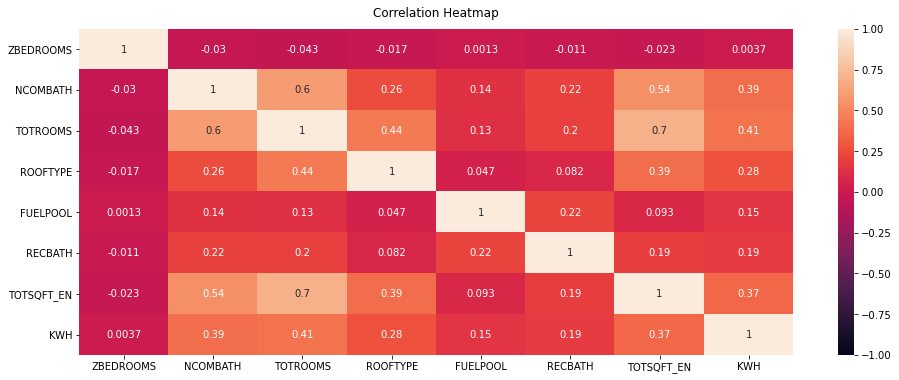

In [11]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

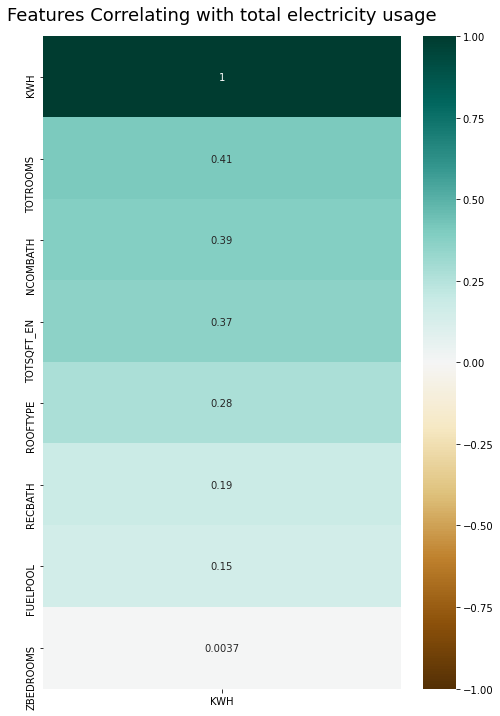

In [12]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(dataframe.corr()[['KWH']].sort_values(by='KWH', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with total electricity usage', fontdict={'fontsize':18}, pad=16);

In [27]:
y = dataframe['KWH']


In [28]:
X = dataframe[['ZBEDROOMS','NCOMBATH','TOTROOMS','ROOFTYPE','TOTSQFT_EN','FUELPOOL','RECBATH']]


### Splitting The Data into Training And Testing Dataset
 Set a variable X equal to the numerical features of the dataframe and a variable y equal to the "Total kilowatts per hour" column.

In [29]:

train_X, test_X,train_y,test_y = train_test_split(X, y, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(3980, 8)
(1706, 8)


In [30]:
train_X.head()

,ZBEDROOMS,NCOMBATH,TOTROOMS,ROOFTYPE,TOTSQFT_EN,FUELPOOL,RECBATH
1560,0,1,5,5,1050,-2,0
4985,0,2,6,5,2094,-2,0
5059,0,2,9,5,2916,-2,0
4335,0,3,11,5,3644,-2,0
3775,0,1,5,5,1632,-2,0


In [31]:
test_X.head()

,ZBEDROOMS,NCOMBATH,TOTROOMS,ROOFTYPE,TOTSQFT_EN,FUELPOOL,RECBATH
3364,0,1,5,-2,413,-2,0
1738,0,2,4,5,728,-2,0
5615,0,1,5,5,1232,-2,0
1344,0,1,6,5,1312,-2,0
1441,0,2,9,3,1900,-2,0



### Training the Model

### Linear Regression
Create an instance of a LinearRegression() model named lm.

In [17]:
lm = LinearRegression() #Create an instance of a LinearRegression() model named lm.

model = lm.fit(train_X,train_y)

In [18]:
predictions = lm.predict(train_X)
print(predictions)

[ 8824.18566517 11768.17102573  6018.70933363 ... 11475.51966605
 16346.51724824  9267.31133076]


In [19]:
lm.score(train_X,train_y)

0.2356525379547617

### print coefficients

In [20]:
lm.coef_

array([2.16647481e+03, 1.80775822e+03, 4.29373652e+02, 3.28127297e+02,
       5.50080537e-01, 6.09207847e+02, 1.78524232e+03])

### print intercept

In [21]:
lm.intercept_


3858.7522182272023


### Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

###  Use lm.predict() to predict off the X_test set of the data.



In [22]:
predictions = lm.predict(test_X)


### Create a scatterplot of the real test values versus the predicted values.



Text(0, 0.5, 'Predicted Y')

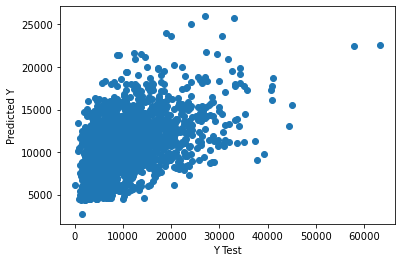

In [23]:
plt.scatter(test_y,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Evaluating the Model
 calculating the residual sum of squares and the explained variance score (R^2)

#### Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.



In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(test_y, predictions))
print('MSE:', metrics.mean_squared_error(test_y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))

MAE: 4894.183780133641
MSE: 41882764.772084475
RMSE: 6471.6894835958


### Residuals


#### Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().



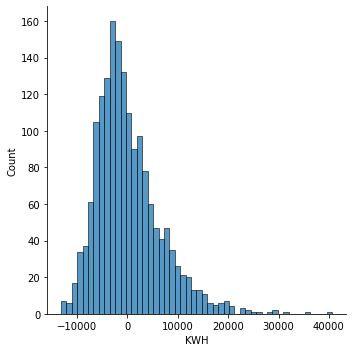

In [25]:
sns.displot((test_y-predictions),bins=50);


### Conclusion

In [32]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
ZBEDROOMS,2166.474806
NCOMBATH,1807.758218
TOTROOMS,429.373652
ROOFTYPE,328.127297
TOTSQFT_EN,0.550081
FUELPOOL,609.207847
RECBATH,1785.242323
